# Classical Hall effect


In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib widget

In [8]:
hbar = 1.054571817e-34 # Js
me = 9.1093837015e-31 # kg
q = 1.602176634e-19 # C
kB = 1.380649e-23 # J/K

For a two-dimensional carrier gas (2DCG) with sheet density $n_s$ and mobility $\mu$ the zero-field conductivity is given by $\sigma_0 = n_s e \mu$ so that (from the Boltzmann equation)

$$\sigma_{xx} = \frac{\sigma_0}{1+(\mu B)^2}=\frac{n_s e \mu}{1+(\mu B)^2} , ~~~\sigma_{xy} = \frac{\sigma_0 \mu B}{1+(\mu B)^2} = \frac{n_s e \mu^2 B}{1+(\mu B)^2}$$


in a Hall-effect measurement we actually measure $\rho_{xx}$ and $\rho_{xy}$ as a function of $B$.

$$\rho_{xx} = \frac{\sigma_{xx}}{\sigma^2_{xx}+\sigma^2_{xy}}$$
$$\rho_{xy} = \frac{\sigma_{xy}}{\sigma^2_{xx}+\sigma^2_{xy}}$$

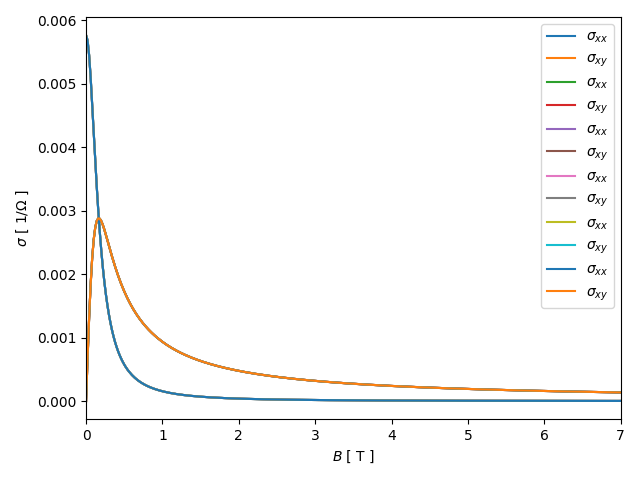

None

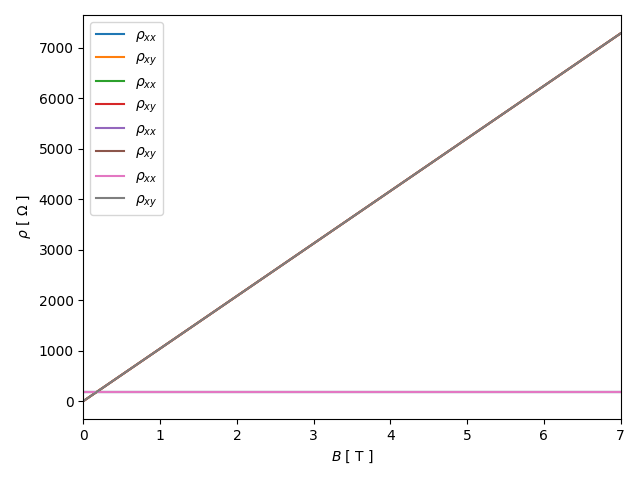

In [15]:
mu = 60000 # cm2/Vs
ns = 6e11 # cm-2

mum = mu*1e-4
nsm = ns*1e4

Bmax = 7.00 # T
Bstep = 0.02 # T
Bmin = 0.00 # T
Bres = 1/Bstep # B points per T

Bvals = np.linspace(Bmin,Bmax,1+int((Bmax-Bmin)*Bres),endpoint=True)

sigma0 = ns*q*mu

sigmaxx = sigma0/(1+(mum*Bvals)**2)
sigmaxy = sigmaxx*mum*Bvals

plt.figure('Classical Hall conductivity', layout='tight')
plt.xlabel('$B$ [ T ]')
plt.xlim(Bmin,Bmax)
plt.ylabel('$\\sigma$ [ $1/\\Omega$ ]')
plt.plot(Bvals,sigmaxx, label='$\\sigma_{xx}$')
plt.plot(Bvals,sigmaxy, label='$\\sigma_{xy}$')
plt.legend()
display(plt.show())



rhoM = 1/(sigmaxx**2 + sigmaxy**2)
rhoxx = sigmaxx*rhoM
rhoxy = sigmaxy*rhoM

plt.figure('Classical Hall effect', layout='tight')
plt.xlabel('$B$ [ T ]')
plt.xlim(Bmin,Bmax)
plt.ylabel('$\\rho$ [ $\\Omega$ ]')
plt.plot(Bvals,rhoxx, label='$\\rho_{xx}$')
plt.plot(Bvals,rhoxy, label='$\\rho_{xy}$')
plt.legend()
plt.show()

Note that $\sigma_{xx}$ and $\sigma_{xy}$ cross over at a field equivalent to $B = 1/\mu$

In [18]:
print(1/mum)

0.16666666666666666


For the case of a single ideal carrier population, $\rho_{xx} = \rho_0 = 1/\sigma_0$ is constant and $\rho_{xy}$ has a constant slope such that $R_H = \rho_{xy}/B$, the Hall coefficient, is constant.

Then we have $$\mu = \frac{R_H}{\rho_0} ~~~~~n_s = \frac{1}{e R_H}$$

Again, $\rho_{xx} = \rho_{xy}$ at $B = 1/\mu$.


## multiple carrier gases

In the case of multiple ideal carrier gases, we sum their conductivities. A second carrier gas may arise in the case of conduction through a dopant layer, a channel induced at the surface, or even a second sub-band in the quantum well assuming there is no significant scattering between the sub-band states.

$$\sigma_1 = n_1 e \mu_1,~~~\sigma_2 = n_2 e \mu_2$$

$$\sigma_{xx} = \frac{n_1 e \mu_1}{1+\mu_1 B}+\frac{n_2 e \mu_2}{1+\mu_2 B}$$
$$\sigma_{xy} = \frac{n_1 e \mu^2_1 B}{1+\mu_1 B}+\frac{n_2 e \mu^2_2 B}{1+\mu_2 B}$$

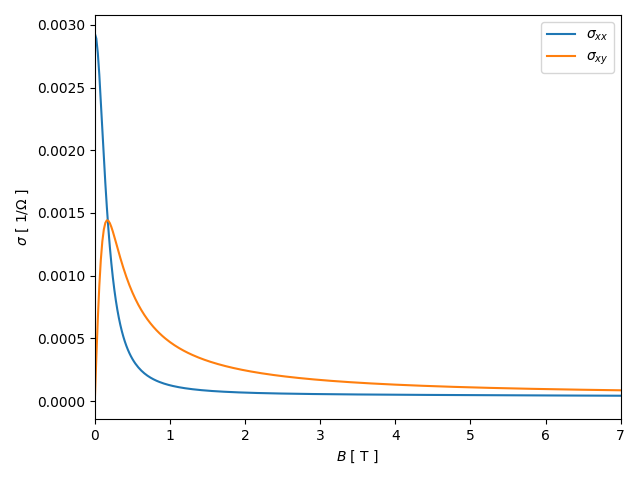

In [19]:
mu1 = 60000 # cm2/Vs
ns1 = 3.0e11 # cm-2

mu2 = 600 # cm2/Vs
ns2 = 5.0e11 # cm-2

mum1 = mu1*1e-4
nsm1 = ns1*1e4

mum2 = mu2*1e-4
nsm2 = ns2*1e4

sigma01 = ns1*q*mu1
sigma02 = ns2*q*mu2

sigmaxx1 = sigma01/(1+(mum1*Bvals)**2)
sigmaxy1 = sigmaxx1*mum1*Bvals

sigmaxx2 = sigma02/(1+(mum2*Bvals)**2)
sigmaxy2 = sigmaxx2*mum2*Bvals

sigmaxx = sigmaxx1 + sigmaxx2
sigmaxy = sigmaxy1 + sigmaxy2

plt.figure('Conductivity of two channels', layout='tight')
plt.xlabel('$B$ [ T ]')
plt.xlim(Bmin,Bmax)
plt.ylabel(r'$\sigma$ [ $1/\Omega$ ]')
plt.plot(Bvals,sigmaxx, label=r'$\sigma_{xx}$')
plt.plot(Bvals,sigmaxy, label=r'$\sigma_{xy}$')
plt.legend()
plt.show()

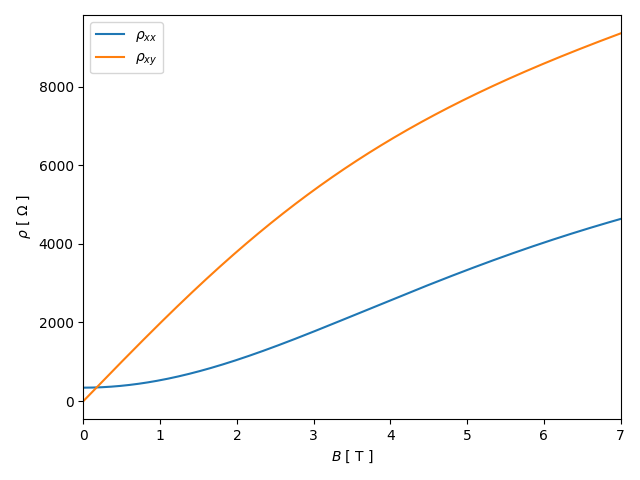

In [20]:
rhoM = 1/(sigmaxx**2 + sigmaxy**2)

rhoxx = sigmaxx*rhoM
rhoxy = sigmaxy*rhoM

plt.figure('Hall effect of two channels', layout='tight')
plt.xlabel('$B$ [ T ]')
plt.xlim(Bmin,Bmax)
plt.ylabel('$\\rho$ [ $\\Omega$ ]')
plt.plot(Bvals,rhoxx, label='$\\rho_{xx}$')
plt.plot(Bvals,rhoxy, label='$\\rho_{xy}$')
plt.legend()
plt.show()

As can be seen, this always leads to positive magnetoresistance, i.e. $\rho_{xx}$ which increases with $B$. $\rho_{xy}$ usually changes to a lower slope as $B$ increases.

For low field ($B \ll 1/\mu$) we should find the "Hall mobility" and "Hall sheet density":

$$\mu_H = \frac{n_1 \mu^2_1 + n_2 \mu^2_2}{n_1 \mu_1 + n_2 \mu_2}$$
$$n_H = \frac{(n_1 \mu_1 + n_2 \mu_2)^2}{n_1 \mu^2_1 + n_2 \mu^2_2}$$

In general, we can replace the sum of discrete carrier populations with a function $s(\mu)$, called the mobility spectrum, which gives the contribution to the total conductivity from carriers at every mobility. We can adopt a convention in which holes have a positive mobility and sheet density, and electrons have a negative mobility and sheet density, so that they both contribute a positive conductivity. The expressions for the components of $\sigma$ then become integrals.